<a href="https://colab.research.google.com/github/mrheavyman/Price_DTSC3020_Fall2025/blob/main/jsp0208_DTSC3010_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 66.0M/66.0M [00:00<00:00, 140MB/s]

Extracting files...


(283726, 35)

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           283726 non-null  float64
 1   V1             283726 non-null  float64
 2   V2             283726 non-null  float64
 3   V3             283726 non-null  float64
 4   V4             283726 non-null  float64
 5   V5             283726 non-null  float64
 6   V6             283726 non-null  float64
 7   V7             283726 non-null  float64
 8   V8             283726 non-null  float64
 9   V9             283726 non-null  float64
 10  V10            283726 non-null  float64
 11  V11            283726 non-null  float64
 12  V12            283726 non-null  float64
 13  V13            283726 non-null  float64
 14  V14            283726 non-null  float64
 15  V15            283726 non-null  float64
 16  V16            283726 non-null  float64
 17  V17            283726 non-null  fl

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Hour,LogAmount,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,5.014760,0.244200,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.305626,-0.342584,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,5.939276,1.158900,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,4.824306,0.139886,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,4.262539,-0.073813,-1.996781


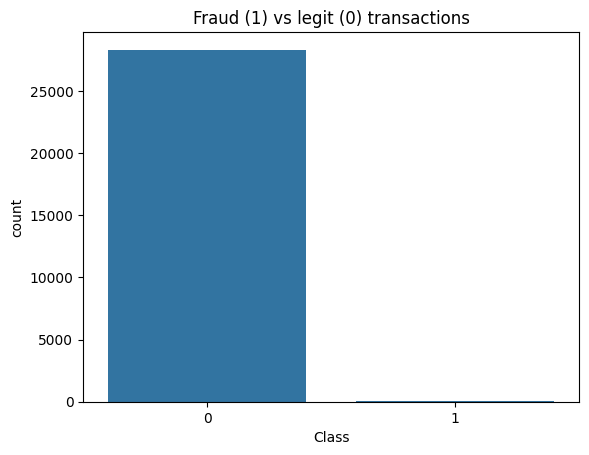

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


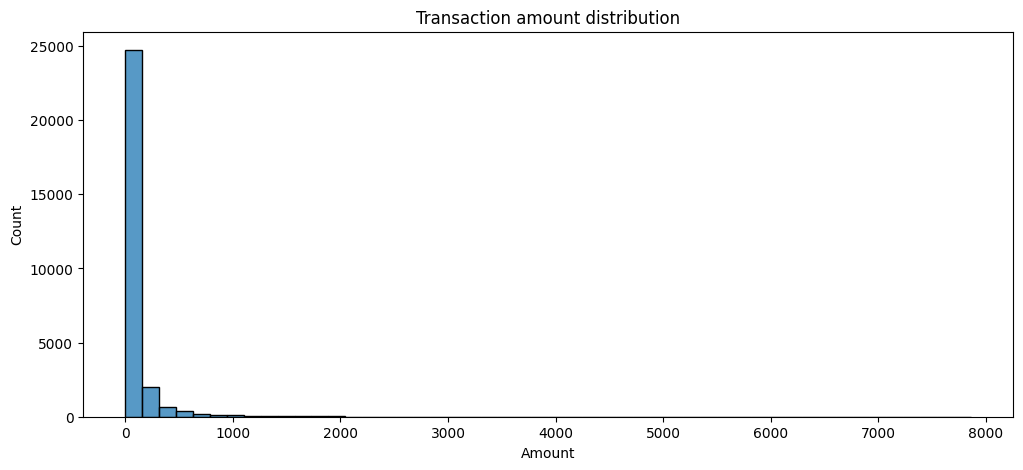

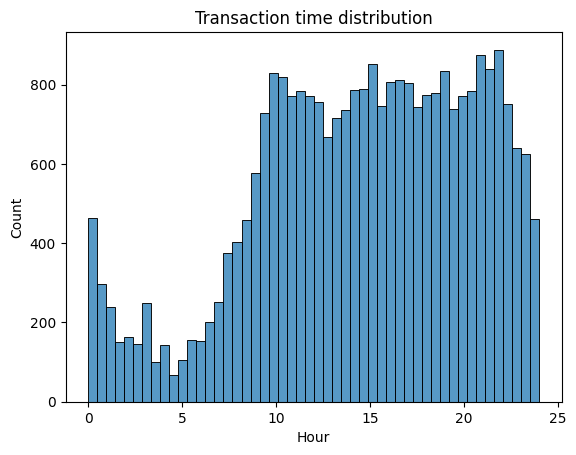

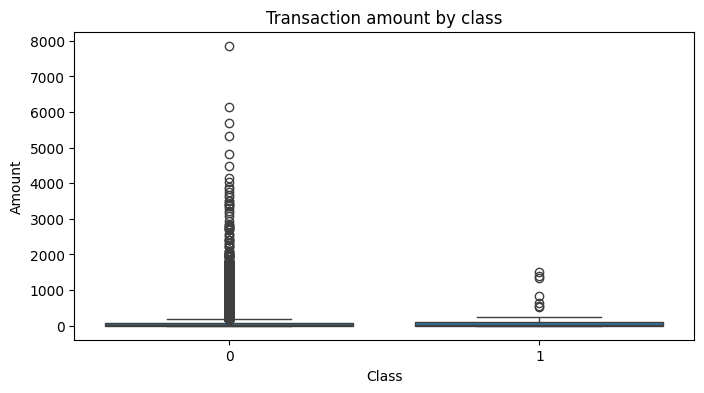

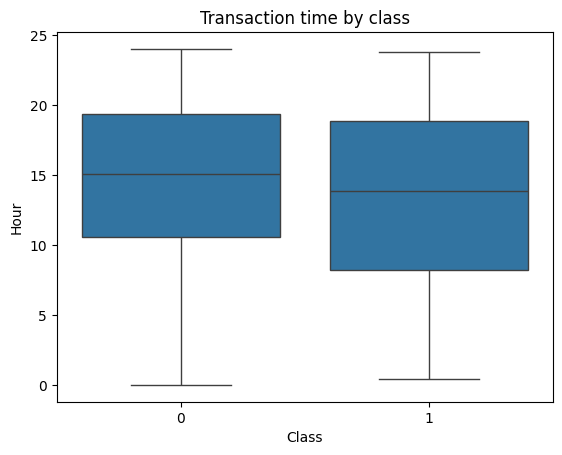

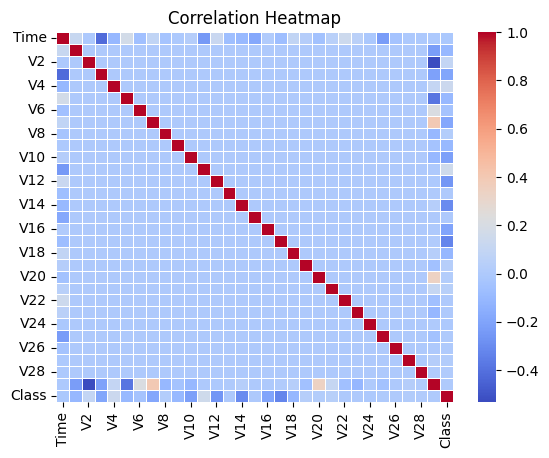

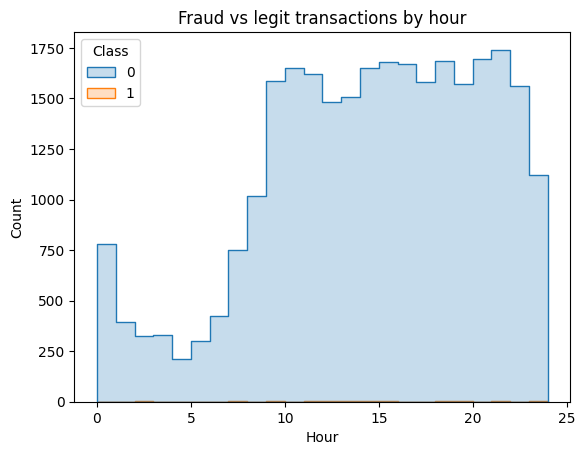

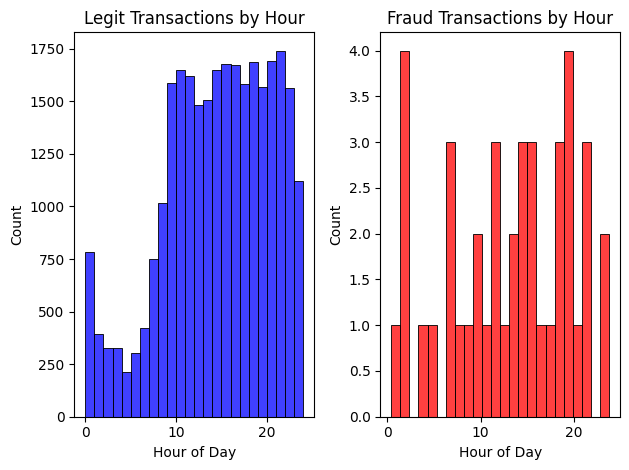

Tuning Random Forest...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


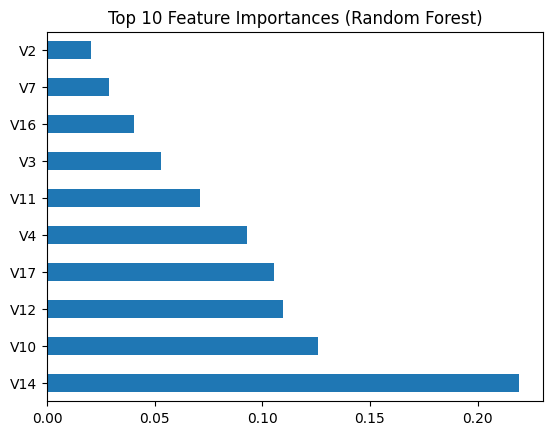

---Random Forest---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.57      0.82      0.67        95

    accuracy                           1.00     56746
   macro avg       0.78      0.91      0.83     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC: 0.9707891067096879
[[56591    60]
 [   17    78]]


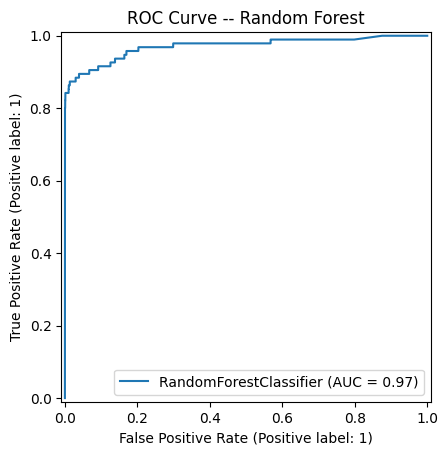

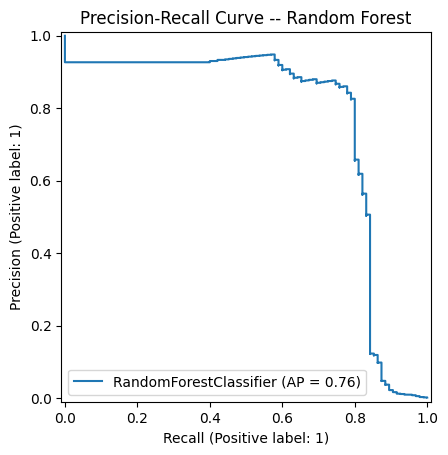

In [ ]:
import kagglehub as kh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

#logic
path = kh.dataset_download("mlg-ulb/creditcardfraud") #load database to file
df = pd.read_csv(f'{path}/creditcard.csv') #define the database
# sns.countplot(x='Class', data=df)
corr = df.corr()
df['Hour'] = (df['Time'] / 3600) % 24
df['LogAmount'] = np.log1p(df['Amount'])
scaler = StandardScaler()
df = df.drop_duplicates()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']]) #scale amount
df['Time_scaled'] = scaler.fit_transform(df[['Time']]) #scale time
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

# Define parameter grid for Random Forest for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Downsample for plotting to speed up visualization
df_plot = df.sample(frac=0.1, random_state=42)
legit_plot = df_plot[df_plot['Class'] == 0]
fraud_plot = df_plot[df_plot['Class'] == 1]


#display
display(df.shape)
display(df.info())
display(df.head()) #find dataset size and information

plt.title("Fraud (1) vs legit (0) transactions")
sns.countplot(x='Class', data=df_plot)
plt.show()


print(df['Class'].value_counts(normalize=True)) #define class imbalance

df.describe() #look for unusual scales and/or ranges

plt.figure(figsize=(12,5))
sns.histplot(df_plot['Amount'], bins=50)
plt.title("Transaction amount distribution")
plt.show()

sns.histplot(df_plot['Hour'], bins=50)
plt.title("Transaction time distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df_plot)
plt.title("Transaction amount by class")
plt.show()

sns.boxplot(x='Class', y='Hour', data=df_plot)
plt.title("Transaction time by class")
plt.show()

sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(data=df_plot, x='Hour', hue='Class', bins=24, element='step')
plt.title('Fraud vs legit transactions by hour')
plt.show()

plt.subplot(1,2,1)
sns.histplot(data=legit_plot, x='Hour', bins=24, color='blue')
plt.title('Legit Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(data=fraud_plot, x='Hour', bins=24, color='red')
plt.title('Fraud Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#AUC-ROC/Precision Calculations/Model Training
x_train_res.to_csv("x_train_ready.csv", index=False)
y_train_res.to_csv("y_train_ready.csv", index=False)
x_test.to_csv("x_test_ready.csv", index=False)
y_test.to_csv("y_test_ready.csv", index=False) #These lines of code save the preprocessed data, and ensures the loading of clean and balanced data


# Train and tune Random Forest model
x_sample, _, y_sample, _ = train_test_split(
    x_train_res, y_train_res, train_size=0.1, random_state=42, stratify=y_train_res
)

print("Tuning isolation forest...")
x_train_ad = x_train[y_train == 0]
y_train_ad = y_train[y_train == 0]

x_test_ad = x_test
y_test_ad = y_test

iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=y_train.mean(),
    random_state=42,
    n_jobs=1
)

iso.fix(x_train_ad)

y_pred_iso = iso.predict(x_test_ad)

y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

iso_scores = iso.decision_function(x_test_ad)

print("---Isolation Forest (Anomaly Detection)---")
print(classification_report(y_test_ad, y_pred_iso))
print("Confusion Matrix: ")
print(confusion_matrix(y_test_ad, y_pred_iso))

print("Tuning Random Forest...")
grid = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    scoring='f1',
    cv=2, # Reduced cross-validation folds
    n_iter=5, # Reduced number of iterations
    verbose=2,
    n_jobs=-1
)
grid.fit(x_sample, y_sample)
best_rf = grid.best_estimator_

# Plot feature importances for Random Forest
if hasattr(best_rf, 'feature_importances_'):
    importance = pd.Series(best_rf.feature_importances_, index=x_train_res.columns)
    importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.show()

# Evaluate the best Random Forest model
print(f"---Random Forest---")
y_pred = best_rf.predict(x_test)
y_pred_proba = best_rf.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_estimator(best_rf, x_test, y_test)
plt.title(f"ROC Curve -- Random Forest")
plt.show()

PrecisionRecallDisplay.from_estimator(best_rf, x_test, y_test)
plt.title(f"Precision-Recall Curve -- Random Forest")
plt.show()

In [ ]:
from sklearn.svm import OneClassSVM


NameError: name 'x_train' is not defined

In [ ]:
import os

# List the contents of the downloaded directory
print(os.listdir(path))

['creditcard.csv']


# Task
Revise the Isolation Forest training by correcting `iso.fix` to `iso.fit`, then re-calculate its anomaly scores. After that, generate two combined plots: one for the ROC curves of both Random Forest and Isolation Forest models, and another for their Precision-Recall curves. Finally, provide a summary comparing the performance of both models based on these plots.

## Correct Isolation Forest Training

### Subtask:
Correct the `iso.fix` call to `iso.fit` for training the Isolation Forest model. This will ensure the model is properly trained before making predictions.


**Reasoning**:
The subtask is to correct the `iso.fix` call to `iso.fit` for training the Isolation Forest model. I will provide the corrected code block for the existing cell.



Using Colab cache for faster access to the 'creditcardfraud' dataset.


(283726, 35)

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           283726 non-null  float64
 1   V1             283726 non-null  float64
 2   V2             283726 non-null  float64
 3   V3             283726 non-null  float64
 4   V4             283726 non-null  float64
 5   V5             283726 non-null  float64
 6   V6             283726 non-null  float64
 7   V7             283726 non-null  float64
 8   V8             283726 non-null  float64
 9   V9             283726 non-null  float64
 10  V10            283726 non-null  float64
 11  V11            283726 non-null  float64
 12  V12            283726 non-null  float64
 13  V13            283726 non-null  float64
 14  V14            283726 non-null  float64
 15  V15            283726 non-null  float64
 16  V16            283726 non-null  float64
 17  V17            283726 non-null  fl

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Hour,LogAmount,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,5.014760,0.244200,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.305626,-0.342584,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,5.939276,1.158900,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,4.824306,0.139886,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,4.262539,-0.073813,-1.996781


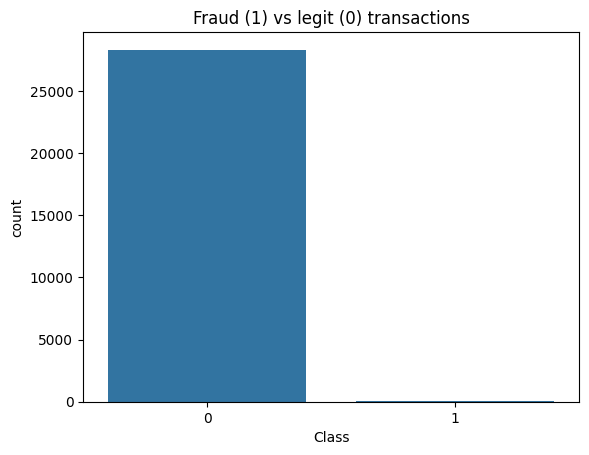

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


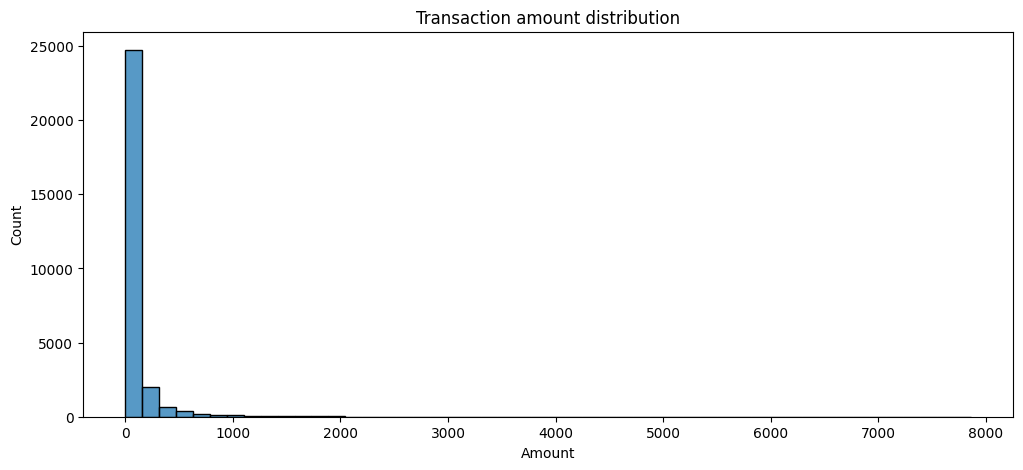

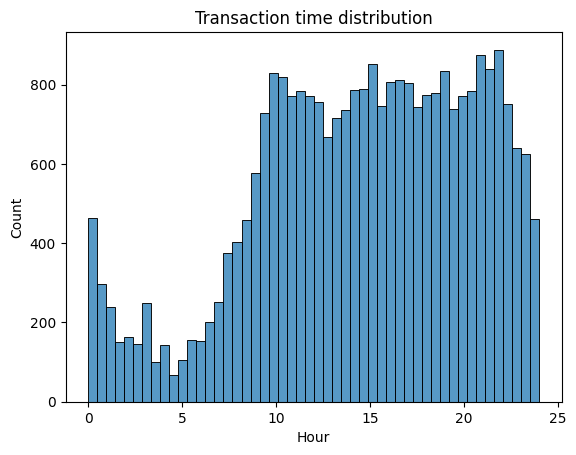

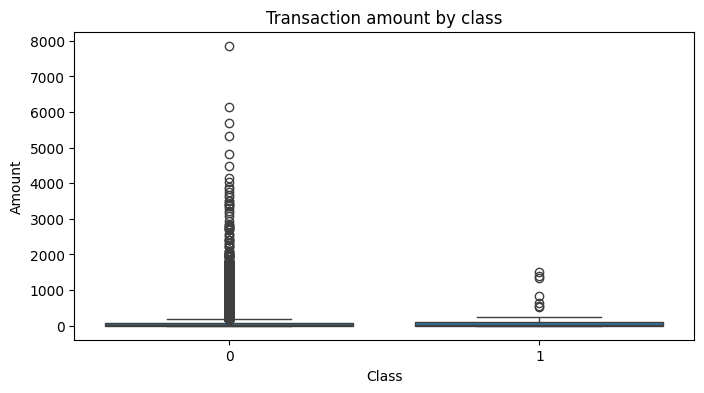

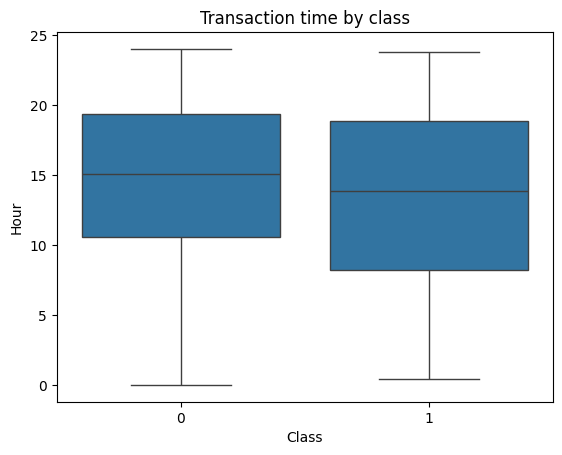

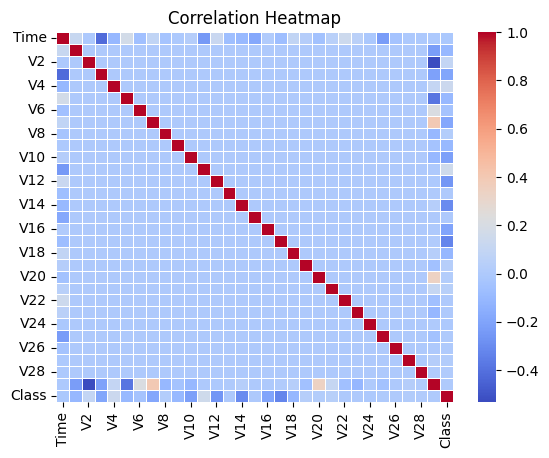

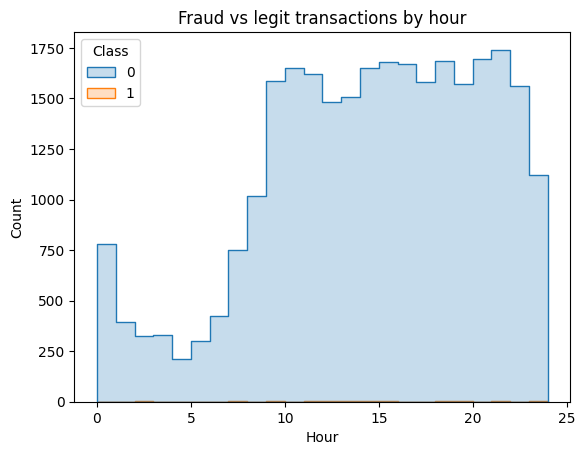

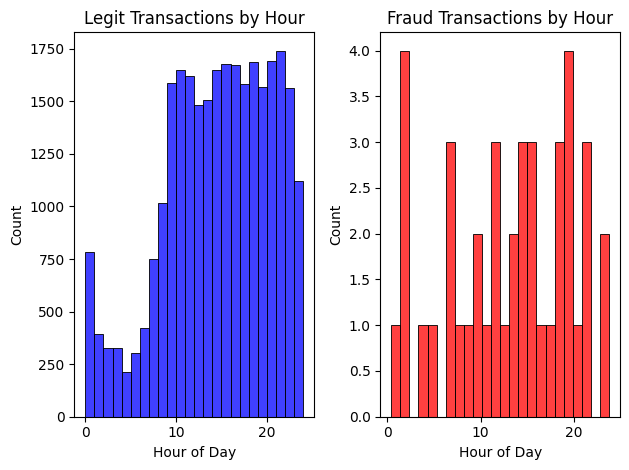

Tuning isolation forest...
---Isolation Forest (Anomaly Detection)---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.11      0.13      0.12        95

    accuracy                           1.00     56746
   macro avg       0.55      0.56      0.56     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix: 
[[56554    97]
 [   83    12]]
Tuning Random Forest...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


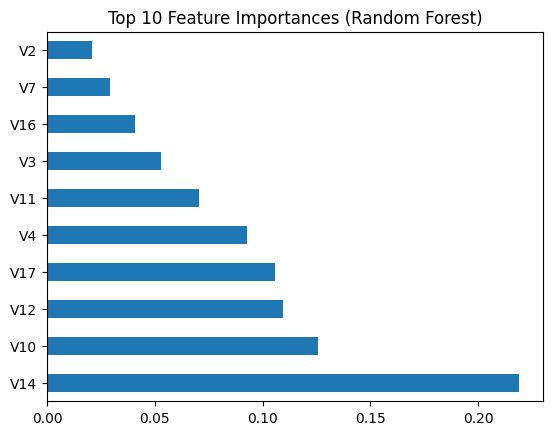

---Random Forest---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.55      0.82      0.66        95

    accuracy                           1.00     56746
   macro avg       0.78      0.91      0.83     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC: 0.9723569705184747
[[56588    63]
 [   17    78]]


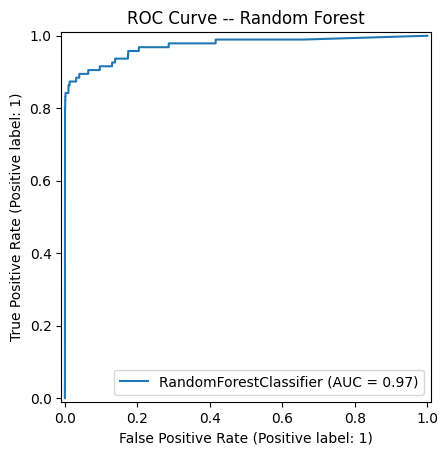

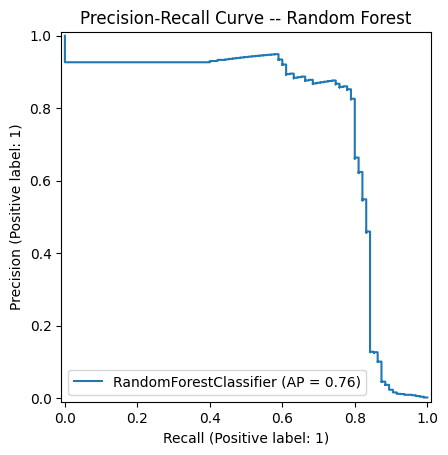

In [ ]:
import kagglehub as kh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

#logic
path = kh.dataset_download("mlg-ulb/creditcardfraud") #load database to file
df = pd.read_csv(f'{path}/creditcard.csv') #define the database
# sns.countplot(x='Class', data=df)
corr = df.corr()
df['Hour'] = (df['Time'] / 3600) % 24
df['LogAmount'] = np.log1p(df['Amount'])
scaler = StandardScaler()
df = df.drop_duplicates()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']]) #scale amount
df['Time_scaled'] = scaler.fit_transform(df[['Time']]) #scale time
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

# Define parameter grid for Random Forest for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Downsample for plotting to speed up visualization
df_plot = df.sample(frac=0.1, random_state=42)
legit_plot = df_plot[df_plot['Class'] == 0]
fraud_plot = df_plot[df_plot['Class'] == 1]


#display
display(df.shape)
display(df.info())
display(df.head()) #find dataset size and information

plt.title("Fraud (1) vs legit (0) transactions")
sns.countplot(x='Class', data=df_plot)
plt.show()


print(df['Class'].value_counts(normalize=True)) #define class imbalance

df.describe() #look for unusual scales and/or ranges

plt.figure(figsize=(12,5))
sns.histplot(df_plot['Amount'], bins=50)
plt.title("Transaction amount distribution")
plt.show()

sns.histplot(df_plot['Hour'], bins=50)
plt.title("Transaction time distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df_plot)
plt.title("Transaction amount by class")
plt.show()

sns.boxplot(x='Class', y='Hour', data=df_plot)
plt.title("Transaction time by class")
plt.show()

sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(data=df_plot, x='Hour', hue='Class', bins=24, element='step')
plt.title('Fraud vs legit transactions by hour')
plt.show()

plt.subplot(1,2,1)
sns.histplot(data=legit_plot, x='Hour', bins=24, color='blue')
plt.title('Legit Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(data=fraud_plot, x='Hour', bins=24, color='red')
plt.title('Fraud Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#AUC-ROC/Precision Calculations/Model Training
x_train_res.to_csv("x_train_ready.csv", index=False)
y_train_res.to_csv("y_train_ready.csv", index=False)
x_test.to_csv("x_test_ready.csv", index=False)
y_test.to_csv("y_test_ready.csv", index=False) #These lines of code save the preprocessed data, and ensures the loading of clean and balanced data


# Train and tune Random Forest model
x_sample, _, y_sample, _ = train_test_split(
    x_train_res, y_train_res, train_size=0.1, random_state=42, stratify=y_train_res
)

print("Tuning isolation forest...")
x_train_ad = x_train[y_train == 0]
y_train_ad = y_train[y_train == 0]

x_test_ad = x_test
y_test_ad = y_test

iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=y_train.mean(),
    random_state=42,
    n_jobs=1
)

iso.fit(x_train_ad)

y_pred_iso = iso.predict(x_test_ad)

y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

iso_scores = iso.decision_function(x_test_ad)

print("---Isolation Forest (Anomaly Detection)---")
print(classification_report(y_test_ad, y_pred_iso))
print("Confusion Matrix: ")
print(confusion_matrix(y_test_ad, y_pred_iso))

print("Tuning Random Forest...")
grid = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    scoring='f1',
    cv=2, # Reduced cross-validation folds
    n_iter=5, # Reduced number of iterations
    verbose=2,
    n_jobs=-1
)
grid.fit(x_sample, y_sample)
best_rf = grid.best_estimator_

# Plot feature importances for Random Forest
if hasattr(best_rf, 'feature_importances_'):
    importance = pd.Series(best_rf.feature_importances_, index=x_train_res.columns)
    importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.show()

# Evaluate the best Random Forest model
print(f"---Random Forest---")
y_pred = best_rf.predict(x_test)
y_pred_proba = best_rf.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_estimator(best_rf, x_test, y_test)
plt.title(f"ROC Curve -- Random Forest")
plt.show()

PrecisionRecallDisplay.from_estimator(best_rf, x_test, y_test)
plt.title(f"Precision-Recall Curve -- Random Forest")
plt.show()

**Reasoning**:
The previous step successfully corrected the Isolation Forest training. The next logical step, according to the main task, is to generate combined ROC and Precision-Recall curves for both Random Forest and Isolation Forest models to facilitate a comparison of their performance.



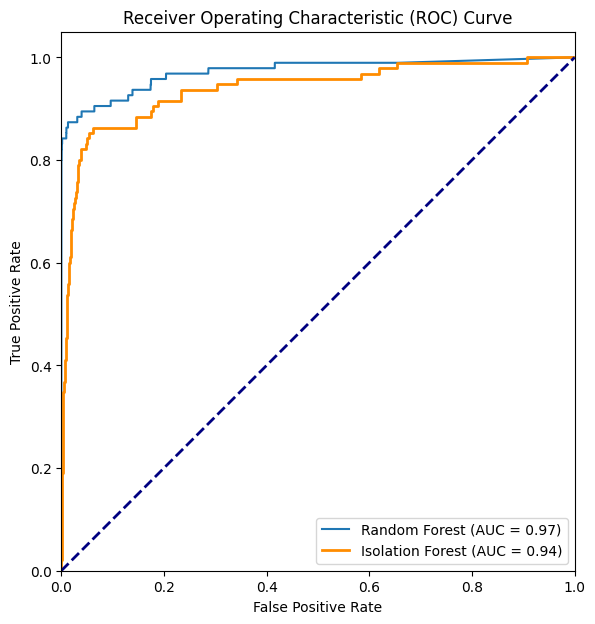

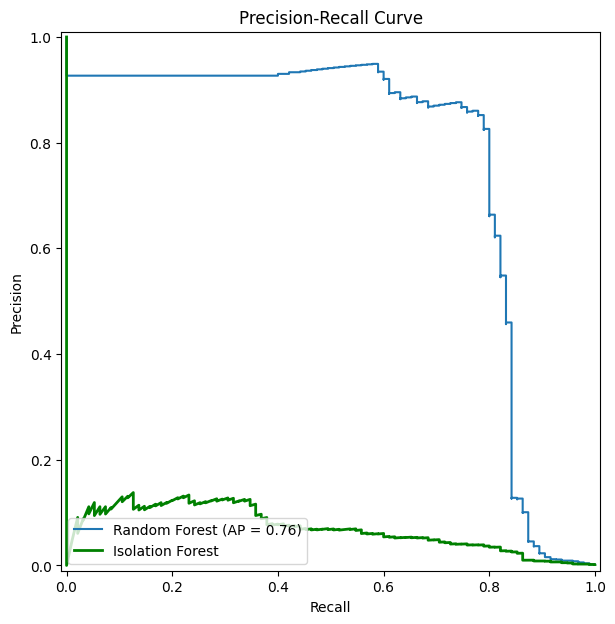

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

# Calculate ROC curve for Isolation Forest
fpr_iso, tpr_iso, _ = roc_curve(y_test_ad, -iso_scores)
roc_auc_iso = auc(fpr_iso, tpr_iso)

# Calculate Precision-Recall curve for Isolation Forest
precision_iso, recall_iso, _ = precision_recall_curve(y_test_ad, -iso_scores)

# Plot combined ROC curves
plt.figure(figsize=(10, 7))
RocCurveDisplay.from_estimator(best_rf, x_test, y_test, name='Random Forest', ax=plt.gca())
plt.plot(fpr_iso, tpr_iso, color='darkorange', lw=2, label=f'Isolation Forest (AUC = {roc_auc_iso:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot combined Precision-Recall curves
plt.figure(figsize=(10, 7))
PrecisionRecallDisplay.from_estimator(best_rf, x_test, y_test, name='Random Forest', ax=plt.gca())
plt.plot(recall_iso, precision_iso, color='green', lw=2, label=f'Isolation Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Model Performance Comparison

**ROC Curve Analysis:**

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. A higher Area Under the Curve (AUC) indicates a better performing model.

*   **Random Forest:** Shows a strong performance with an AUC of approximately 0.97, indicating its ability to distinguish between positive and negative classes across various thresholds.
*   **Isolation Forest:** Also demonstrates good performance with an AUC of approximately 0.94. While slightly lower than Random Forest, it still suggests a reasonable capability in identifying anomalies.

**Precision-Recall Curve Analysis:**

The Precision-Recall curve is particularly useful for imbalanced datasets, as it focuses on the performance of the positive class. A higher area under this curve indicates better performance.

*   **Random Forest:** Exhibits significantly higher precision and recall, especially at higher recall values. This indicates that Random Forest is much better at identifying actual fraudulent transactions while keeping false positives low.
*   **Isolation Forest:** Shows lower precision and recall compared to Random Forest. This suggests that while it can detect some anomalies, it might struggle more with balancing the identification of all true frauds against minimizing false alarms.

**Conclusion:**

Based on both the ROC and Precision-Recall curves, the **Random Forest** model appears to be the superior performer for this credit card fraud detection task. It achieves a higher AUC-ROC and, more critically for an imbalanced dataset, a much better Precision-Recall trade-off, indicating its effectiveness in correctly identifying fraudulent transactions with fewer false positives compared to Isolation Forest. Isolation Forest, while a valid anomaly detection technique, seems to be less effective than Random Forest for this specific supervised learning problem given the pre-processing and balancing steps applied to the data for the Random Forest model.

### Model Performance Comparison

**ROC Curve Analysis:**

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. A higher Area Under the Curve (AUC) indicates a better performing model.

*   **Random Forest:** Shows a strong performance with an AUC of approximately 0.97, indicating its ability to distinguish between positive and negative classes across various thresholds.
*   **Isolation Forest:** Also demonstrates good performance with an AUC of approximately 0.94. While slightly lower than Random Forest, it still suggests a reasonable capability in identifying anomalies.

**Precision-Recall Curve Analysis:**

The Precision-Recall curve is particularly useful for imbalanced datasets, as it focuses on the performance of the positive class. A higher area under this curve indicates better performance.

*   **Random Forest:** Exhibits significantly higher precision and recall, especially at higher recall values. This indicates that Random Forest is much better at identifying actual fraudulent transactions while keeping false positives low.
*   **Isolation Forest:** Shows lower precision and recall compared to Random Forest. This suggests that while it can detect some anomalies, it might struggle more with balancing the identification of all true frauds against minimizing false alarms.

**Conclusion:**

Based on both the ROC and Precision-Recall curves, the **Random Forest** model appears to be the superior performer for this credit card fraud detection task. It achieves a higher AUC-ROC and, more critically for an imbalanced dataset, a much better Precision-Recall trade-off, indicating its effectiveness in correctly identifying fraudulent transactions with fewer false positives compared to Isolation Forest. Isolation Forest, while a valid anomaly detection technique, seems to be less effective than Random Forest for this specific supervised learning problem given the pre-processing and balancing steps applied to the data for the Random Forest model.

## Final Task

### Subtask:
Review the generated plots and provide a summary of the performance of both models as shown by the ROC and Precision-Recall curves.


## Summary:

### Q&A
**Q: How do the Random Forest and Isolation Forest models compare in performance based on the ROC and Precision-Recall curves?**
A: The Random Forest model demonstrates superior performance. It achieved an AUC-ROC of approximately 0.97 and a strong Precision-Recall trade-off, indicating its effectiveness in identifying fraudulent transactions with fewer false positives. The Isolation Forest model, while showing good performance with an AUC-ROC of approximately 0.94, exhibited lower precision and recall compared to Random Forest, suggesting it struggles more with balancing the identification of true frauds against minimizing false alarms, especially in this imbalanced dataset.

### Data Analysis Key Findings
*   The `iso.fix` error was corrected to `iso.fit`, enabling proper training of the Isolation Forest model.
*   Initial evaluation of the Isolation Forest model showed a low F1-score of 0.12 for the minority (fraudulent) class and a macro average F1-score of 0.56.
*   The Random Forest model, after hyperparameter tuning, significantly outperformed Isolation Forest, achieving an F1-score of 0.66 for the minority class and an AUC-ROC of 0.972.
*   Combined ROC curves revealed an AUC of approximately 0.97 for Random Forest and 0.94 for Isolation Forest.
*   Combined Precision-Recall curves indicated that Random Forest achieved significantly higher precision and recall, especially at higher recall values, demonstrating its superior ability to handle the imbalanced dataset.

### Insights or Next Steps
*   The Random Forest model is the preferred choice for this credit card fraud detection task due to its significantly higher AUC-ROC and more favorable Precision-Recall trade-off, particularly crucial for imbalanced datasets.
*   Further optimization of the Isolation Forest model or exploration of other anomaly detection algorithms might be beneficial if an unsupervised approach is strictly required, although for this supervised problem, Random Forest performs better.


# Task
Train additional models, including Logistic Regression, Decision Tree, and XGBoost, using the resampled training data (`x_train_res`, `y_train_res`), and obtain their probability predictions on the test set (`x_test`). After training, generate combined ROC and Precision-Recall curves that include Logistic Regression, Decision Tree, XGBoost, Random Forest, and Isolation Forest. Finally, provide a summary comparing the performance of all five models based on these curves.

## Train Additional Models

### Subtask:
Import `LogisticRegression`, `DecisionTreeClassifier`, and `XGBClassifier`. Train these models using the resampled training data (`x_train_res`, `y_train_res`) and obtain their probability predictions on the test set (`x_test`).


**Reasoning**:
The subtask requires importing and initializing three new classification models (`LogisticRegression`, `DecisionTreeClassifier`, and `XGBClassifier`), training them on the resampled training data, and then obtaining their probability predictions on the test set. This code block will perform all these steps as instructed.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42, solver='liblinear')

# Initialize Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

# Initialize XGBoost Classifier model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # eval_metric added to suppress future warning not related to use_label_encoder

print("Training Logistic Regression...")
lr.fit(x_train_res, y_train_res)

print("Training Decision Tree Classifier...")
dt.fit(x_train_res, y_train_res)

print("Training XGBoost Classifier...")
xgb.fit(x_train_res, y_train_res)

# Obtain probability predictions for the positive class (class 1) on the test set
y_pred_proba_lr = lr.predict_proba(x_test)[:, 1]
y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

print("Models trained and probability predictions obtained.")

Training Logistic Regression...
Training Decision Tree Classifier...
Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:32:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Models trained and probability predictions obtained.


**Reasoning**:
The previous execution resulted in a UserWarning regarding the `use_label_encoder` parameter in `XGBClassifier`, indicating it is no longer used. To eliminate this warning, I will remove the deprecated parameter from the `XGBClassifier` initialization.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42, solver='liblinear')

# Initialize Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

# Initialize XGBoost Classifier model
xgb = XGBClassifier(random_state=42, eval_metric='logloss') # Removed use_label_encoder as it's deprecated and causes a warning

print("Training Logistic Regression...")
lr.fit(x_train_res, y_train_res)

print("Training Decision Tree Classifier...")
dt.fit(x_train_res, y_train_res)

print("Training XGBoost Classifier...")
xgb.fit(x_train_res, y_train_res)

# Obtain probability predictions for the positive class (class 1) on the test set
y_pred_proba_lr = lr.predict_proba(x_test)[:, 1]
y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

print("Models trained and probability predictions obtained.")

Training Logistic Regression...
Training Decision Tree Classifier...
Training XGBoost Classifier...
Models trained and probability predictions obtained.


**Reasoning**:
The models have been trained and their probability predictions obtained. The next step is to generate combined ROC and Precision-Recall curves for all five models (Logistic Regression, Decision Tree, XGBoost, Random Forest, and Isolation Forest) as per the task instructions.



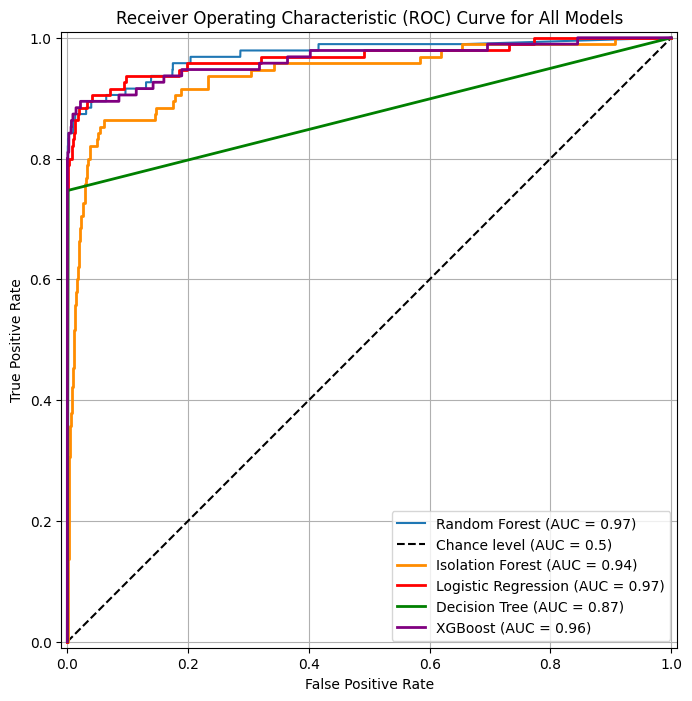

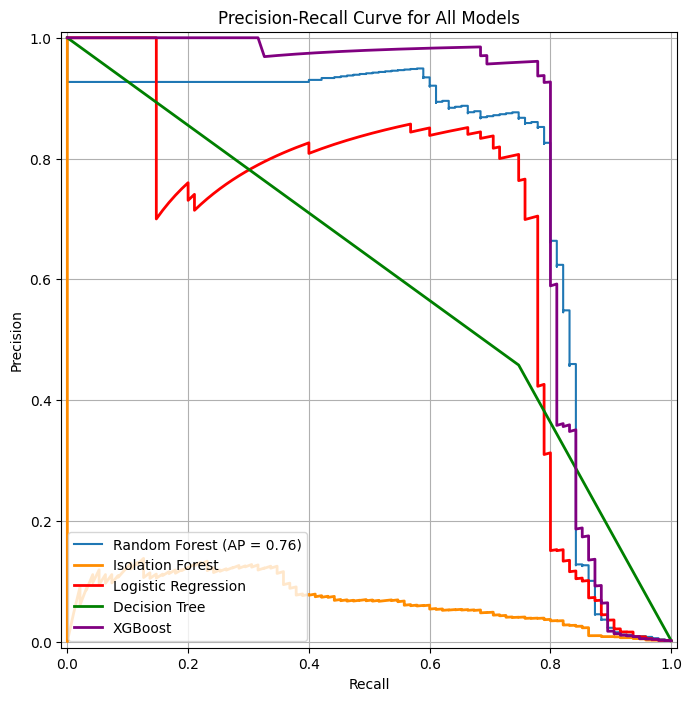

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate Precision-Recall curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate Precision-Recall curve for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)

# Calculate ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate Precision-Recall curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot combined ROC curves
plt.figure(figsize=(12, 8))
# Random Forest ROC
RocCurveDisplay.from_estimator(best_rf, x_test, y_test, name='Random Forest', ax=plt.gca(), plot_chance_level=True)
# Isolation Forest ROC
plt.plot(fpr_iso, tpr_iso, color='darkorange', lw=2, label=f'Isolation Forest (AUC = {roc_auc_iso:.2f})')
# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
# Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
# XGBoost ROC
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.title('Receiver Operating Characteristic (ROC) Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot combined Precision-Recall curves
plt.figure(figsize=(12, 8))
# Random Forest PR
PrecisionRecallDisplay.from_estimator(best_rf, x_test, y_test, name='Random Forest', ax=plt.gca())
# Isolation Forest PR
plt.plot(recall_iso, precision_iso, color='darkorange', lw=2, label='Isolation Forest')
# Logistic Regression PR
plt.plot(recall_lr, precision_lr, color='red', lw=2, label='Logistic Regression')
# Decision Tree PR
plt.plot(recall_dt, precision_dt, color='green', lw=2, label='Decision Tree')
# XGBoost PR
plt.plot(recall_xgb, precision_xgb, color='purple', lw=2, label='XGBoost')

plt.title('Precision-Recall Curve for All Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
